In [27]:
#import necessary modules

from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [28]:
df = pd.read_csv("bike_data.csv", parse_dates = ['start_time','stop_time'])

In [29]:
df['hour'] = df['start_time'].dt.hour.astype('category')
df['month'] = df['start_time'].dt.month.astype('category')


In [30]:
df.columns

Index(['trip_id', 'start_time', 'stop_time', 'bike_id', 'trip_duration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'user_type', 'from_latitude', 'from_longitude',
       'to_latitude', 'to_longitude', 'TMAX', 'TMIN', 'season', 'holiday',
       'walk_score', 'transit_score', 'bike_score', 'distance', 'event_type',
       'rain', 'wind', 'weather', 'year', 'tripdate', 'weekend', 'speed',
       'weekday', 'num_trips_day', 'hour', 'month'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186253 entries, 0 to 186252
Data columns (total 34 columns):
trip_id              186253 non-null int64
start_time           186253 non-null datetime64[ns]
stop_time            186253 non-null datetime64[ns]
bike_id              186253 non-null int64
trip_duration        186253 non-null int64
from_station_id      186253 non-null int64
from_station_name    186253 non-null object
to_station_id        186253 non-null int64
to_station_name      186253 non-null object
user_type            186253 non-null object
from_latitude        186253 non-null float64
from_longitude       186253 non-null float64
to_latitude          186253 non-null float64
to_longitude         186253 non-null float64
TMAX                 186253 non-null float64
TMIN                 186253 non-null float64
season               186253 non-null object
holiday              186253 non-null int64
walk_score           186253 non-null object
transit_score        186253 non-null 


__Outlier detection:__

Let's remove outliers that deviates drastically from other observations in a dataset which might not necessarily problematic but can skew our model by affecting the slope.

In [32]:
def find_outliers(x):
    #Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [33]:
indices, values = find_outliers(df['wind'])
print(np.sort(values))

[15.21 15.21 15.21 ... 19.69 19.69 19.69]


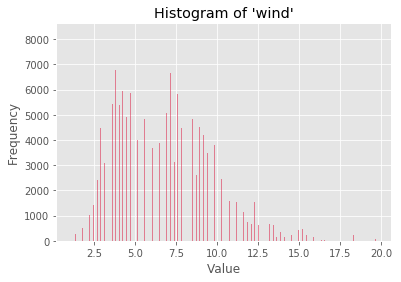

In [34]:
# Use pyplot in matplotlib to plot histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    n = len(x)
    bins = int(np.sqrt(n))
    plt.hist(x, color='crimson',bins = bins, alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
plot_histogram(df['wind'])

In [35]:
indexNames = df[df['wind']>= 15.2].index
df.drop(indexNames , inplace=True)

In [36]:
indices, values = find_outliers(df['trip_duration'])
print(np.sort(values))

[3366 3366 3366 ... 7498 7498 7499]


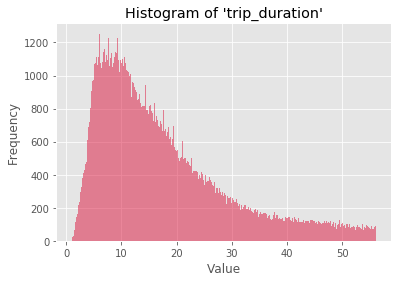

In [40]:
plot_histogram(df['trip_duration'].div(60))

In [41]:
indexNames = df[df['trip_duration']>= 3366].index
df.drop(indexNames , inplace=True)

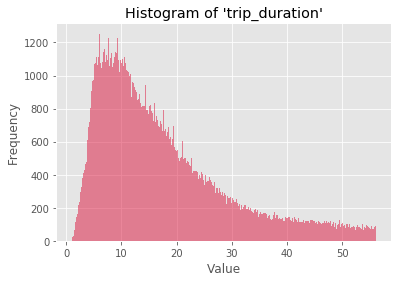

In [42]:
plot_histogram(df['trip_duration'].div(60))

In [233]:
indexNames = df[df['distance']>= 3.27].index
df.drop(indexNames , inplace=True)

[3.27 3.27 3.27 ... 4.97 5.16 5.16]


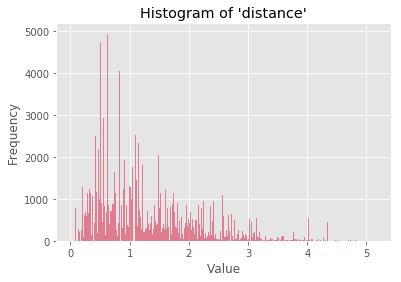

In [234]:
plot_histogram(df['distance'])

In [235]:
indices, values = find_outliers(df['distance'])
print(np.sort(values))

In [236]:
indices, values = find_outliers(df['speed'])
print(np.sort(values))

[10.94 10.94 10.94 ... 29.82 29.85 29.88]


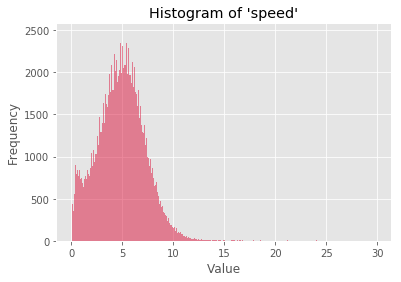

In [237]:
plot_histogram(df['speed'])

In [238]:
indexNames = df[df['speed']>= 10.94].index
df.drop(indexNames , inplace=True)

In [239]:
df.shape

(163317, 34)

There are 163317 rows of data left after removing the outliers.

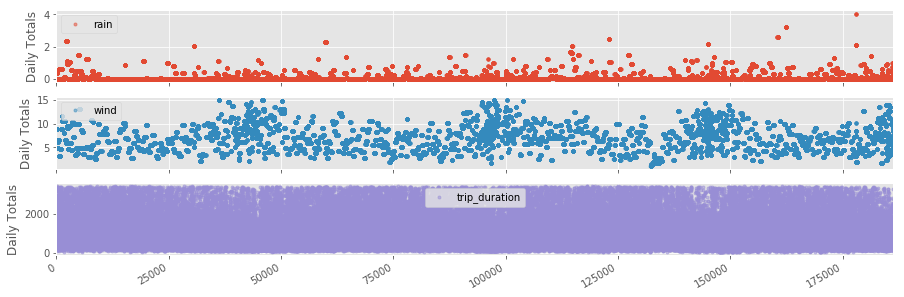

In [240]:
cols_plot = ['rain','wind','trip_duration']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 5), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

In [241]:
df.columns

Index(['trip_id', 'start_time', 'stop_time', 'bike_id', 'trip_duration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'user_type', 'from_latitude', 'from_longitude',
       'to_latitude', 'to_longitude', 'TMAX', 'TMIN', 'season', 'holiday',
       'walk_score', 'transit_score', 'bike_score', 'distance', 'event_type',
       'rain', 'wind', 'weather', 'year', 'tripdate', 'weekend', 'speed',
       'weekday', 'num_trips_day', 'hour', 'month'],
      dtype='object')

In [242]:

df.drop(['trip_id', 'bike_id','from_latitude', 'from_longitude', 'to_latitude', 'to_longitude','from_station_name','to_station_name'], axis = 1, inplace = True)

In [243]:
df.dtypes

start_time         datetime64[ns]
stop_time          datetime64[ns]
trip_duration               int64
from_station_id             int64
to_station_id               int64
user_type                  object
TMAX                      float64
TMIN                      float64
season                     object
holiday                     int64
walk_score                 object
transit_score              object
bike_score                 object
distance                  float64
event_type                 object
rain                      float64
wind                      float64
weather                    object
year                        int64
tripdate                   object
weekend                     int64
speed                     float64
weekday                     int64
num_trips_day               int64
hour                     category
month                    category
dtype: object

In [244]:
#Convert a list of columns as categorical columns
df[['from_station_id','to_station_id','holiday', 'year','month','weekday','weekend','hour']] = df[['from_station_id','to_station_id','holiday', 'year','month','weekday','weekend','hour']].astype('category')

In [245]:
df.dtypes

start_time         datetime64[ns]
stop_time          datetime64[ns]
trip_duration               int64
from_station_id          category
to_station_id            category
user_type                  object
TMAX                      float64
TMIN                      float64
season                     object
holiday                  category
walk_score                 object
transit_score              object
bike_score                 object
distance                  float64
event_type                 object
rain                      float64
wind                      float64
weather                    object
year                     category
tripdate                   object
weekend                  category
speed                     float64
weekday                  category
num_trips_day               int64
hour                     category
month                    category
dtype: object

Index(['trip_duration', 'TMAX', 'TMIN', 'distance', 'rain', 'wind', 'speed',
       'num_trips_day'],
      dtype='object')


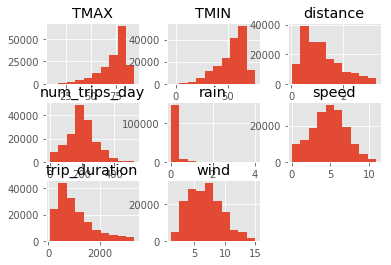

In [246]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int64','int','float']).astype('float')

# Print the column names contained in so_survey_df_num
print(numeric_df.columns)


numeric_df.hist()
plt.show()

In [247]:
#check for missing values
df.isnull().values.any()

False

In [248]:
#Compute pairwise correlation of numeric columns, excluding NA/null values.
df.corr()

,trip_duration,TMAX,TMIN,distance,rain,wind,speed,num_trips_day
trip_duration,1.000000,0.150679,0.127695,0.438611,-0.003062,-0.043783,-0.522792,0.213995
TMAX,0.150679,1.000000,0.908575,0.069564,0.077021,-0.246413,-0.127201,0.624792
TMIN,0.127695,0.908575,1.000000,0.060535,0.153171,-0.230092,-0.114862,0.547975
distance,0.438611,0.069564,0.060535,1.000000,-0.003301,-0.024471,0.373379,0.095663
rain,-0.003062,0.077021,0.153171,-0.003301,1.000000,0.059088,-0.005244,-0.138257
wind,-0.043783,-0.246413,-0.230092,-0.024471,0.059088,1.000000,0.039784,-0.269188
speed,-0.522792,-0.127201,-0.114862,0.373379,-0.005244,0.039784,1.000000,-0.163411
num_trips_day,0.213995,0.624792,0.547975,0.095663,-0.138257,-0.269188,-0.163411,1.000000


In [249]:
df[['TMAX','TMIN']].corr()

,TMAX,TMIN
TMAX,1.000000,0.908575
TMIN,0.908575,1.000000


As we can see, TMAX (maximum temperature) and TMIN (minimum temparature) columns are highly correlated (over 90%). I will take the mean of the two columns


In [250]:
df['temp_mean'] = df[['TMAX','TMIN']].mean(axis = 1)

df.drop(["TMAX","TMIN"], axis = 1, inplace = True)


__Standardization:__

Let's perform a preprocessing task on numerical, continuous data.

In [251]:
#Log normalization for columns with high variance
df.var()

trip_duration    501787.679219
distance              0.521531
rain                  0.093168
wind                  7.445875
speed                 4.864706
num_trips_day      7454.895808
temp_mean           168.705238
dtype: float64

In [252]:
df['num_trips_day'] = np.log1p(df['num_trips_day'])
df['trip_duration'] = np.log(df['trip_duration'])
df['temp_mean'] = np.log(df['temp_mean'])

In [253]:
df.var()

trip_duration    0.481045
distance         0.521531
rain             0.093168
wind             7.445875
speed            4.864706
num_trips_day    0.312101
temp_mean        0.064716
dtype: float64

In [254]:
#check the number of values
df['event_type'].value_counts()

N                    162403
Thunderstorm Wind       390
Flash Flood             305
Hail                     78
Flood                    71
Heavy Rain               49
Winter Weather           13
Winter Storm              3
Lightning                 2
Debris Flow               1
Heavy Snow                1
Ice Storm                 1
Name: event_type, dtype: int64

__Binarizing columns:__

On some occasions, you might only care about if a value exists at all. In these situations, you will want to binarize a column. In the feature event_type, we have a number of events that are rare and have occurred such as tornadoes, flood, heavy snow. we will create a new column titled event_types indicating whether an event has occurred(1) or not(0)



In [255]:
# Create the event_types column filled with zeros
df['event_types'] = 0

# Replace all the event_types values 
df.loc[df['event_type'] != 'N', 'event_types'] = 1
#Drop event_type column
df.drop("event_type", axis = 1, inplace = True)
df['event_types'] =df['event_types'].astype('category')

df.event_types.value_counts()

0    162403
1       914
Name: event_types, dtype: int64

In [256]:
# Create subset of only the categorical_df columns
categorical_df = df.select_dtypes(include=['object','category'])

# Print the column names contained in so_survey_df_num
print(categorical_df.columns)

Index(['from_station_id', 'to_station_id', 'user_type', 'season', 'holiday',
       'walk_score', 'transit_score', 'bike_score', 'weather', 'year',
       'tripdate', 'weekend', 'weekday', 'hour', 'month', 'event_types'],
      dtype='object')


In [260]:
df.dtypes

start_time         datetime64[ns]
stop_time          datetime64[ns]
trip_duration             float64
from_station_id          category
to_station_id            category
user_type                  object
season                     object
holiday                  category
walk_score                 object
transit_score              object
bike_score                 object
distance                  float64
rain                      float64
wind                      float64
weather                    object
year                     category
tripdate                   object
weekend                  category
speed                     float64
weekday                  category
num_trips_day             float64
hour                     category
month                    category
temp_mean                 float64
event_types              category
dtype: object

In [257]:
#df.to_csv("file1.csv", index = False)